In [1]:
using NeuralVerification

┌ Info: Precompiling NeuralVerification [146f25fa-00e7-11e9-3ae5-fdbac6e12fa7]
└ @ Base loading.jl:1278


In [6]:
using Revise, NeuralVerification, ModelingToolkit, LazySets

In [21]:
network = read_nnet("issue.nnet")
network.layers

2-element Array{NeuralVerification.Layer,1}:
 NeuralVerification.Layer{NeuralVerification.ReLU,Float64}([-0.23004744778871178 0.9210992236909084 -0.030635894568796118 -0.34332947427825244; 0.8978626764268087 0.8309944551520903 -0.014461773871067951 -0.6884545083395874; … ; 0.03346675961844259 0.7115606398658421 0.4798026539014697 -0.47832685658716123; -0.5636833238093555 0.04214094639926591 0.7385695072981133 0.6656665947649203], [0.6162281231994049, -0.2842576636476495, 0.17361456246025053, -0.8145690340743399, 0.9609853991020589, 0.7041393195522954, 0.38275285236140943, -0.7922435452981706], NeuralVerification.ReLU())
 NeuralVerification.Layer{NeuralVerification.Id,Float64}([0.5566377731659151 -0.22097068945875353 … 0.5519973844436779 0.9539313268084384; 0.672011854126858 0.7873646431266152 … 0.05450773274033782 -0.7405932810079814; -0.9107076528782465 0.33876887402212397 … 0.425612874065187 -0.889371405676664; -0.2995076129559373 -0.44135435764626374 … -0.8498590494961284 -0.4970584

In [33]:
@time begin
input_set = HPolytope([HalfSpace([1.0, 0.0, 0.0, 0.0], 0.3845579517032085),
                       HalfSpace([0.0, 1.0, 0.0, 0.0], 0.8331193586918577),
                       HalfSpace([0.0, 0.0, 1.0, 0.0], 0.6607352829885846),
                       HalfSpace([0.0, 0.0, 0.0, 1.0], 0.270232549769154), 
                       HalfSpace([-1.0, 0.0, 0.0, 0.0], 0.022984248429274823), 
                       HalfSpace([0.0, -1.0, 0.0, 0.0], 1.061033037362016), 
                       HalfSpace([0.0, 0.0, -1.0, 0.0], 0.734914583454296), 
                       HalfSpace([0.0, 0.0, 0.0, -1.0], 0.7494557834041424)]);

X1 = overapproximate(network.layers[1].weights * input_set + network.layers[1].bias, Hyperrectangle) |> rectify
X1 = rectify(X1)
X2 = overapproximate(network.layers[2].weights * X1 + network.layers[2].bias, Hyperrectangle);
end

  0.000530 seconds (1.08 k allocations: 80.891 KiB)


Hyperrectangle{Float64,Array{Float64,1},Array{Float64,1}}([2.3950844668146862, -0.13751415227951902, -2.1096209129694556, -0.6299855269624741], [3.1193665559469745, 2.295359657778874, 2.454380545304072, 2.4271559068135793])

In [90]:
input_set = HPolytope([HalfSpace([1.0, 0.0, 0.0, 0.0], 0.3845579517032085),
                       HalfSpace([0.0, 1.0, 0.0, 0.0], 0.8331193586918577),
                       HalfSpace([0.0, 0.0, 1.0, 0.0], 0.6607352829885846),
                       HalfSpace([0.0, 0.0, 0.0, 1.0], 0.270232549769154), 
                       HalfSpace([-1.0, 0.0, 0.0, 0.0], 0.022984248429274823), 
                       HalfSpace([0.0, -1.0, 0.0, 0.0], 1.061033037362016), 
                       HalfSpace([0.0, 0.0, -1.0, 0.0], 0.734914583454296), 
                       HalfSpace([0.0, 0.0, 0.0, -1.0], 0.7494557834041424)]);

In [45]:
# using "Ai2h"
@time begin
    H1 = overapproximate(network.layers[1].weights * input_set + network.layers[1].bias, Hyperrectangle)
    H1 = rectify(H1)
    H2 = overapproximate(network.layers[2].weights * H1 + network.layers[2].bias, Hyperrectangle);
end

  0.006664 seconds (1.06 k allocations: 78.672 KiB)


Hyperrectangle{Float64,Array{Float64,1},Array{Float64,1}}([2.3950844668146862, -0.13751415227951902, -2.1096209129694556, -0.6299855269624741], [3.1193665559469745, 2.295359657778874, 2.454380545304072, 2.4271559068135793])

In [46]:
# using "Ai2z"
@time begin
    input_set = overapproximate(input_set, Hyperrectangle) # exact
    input_set = convert(Zonotope, input_set) # also exact

    Z1 = affine_map(network.layers[1].weights, input_set, network.layers[1].bias)
    Z1 = overapproximate(Rectification(Z1), Zonotope)
    Z2 = affine_map(network.layers[2].weights, Z1, network.layers[2].bias)
end

  0.009373 seconds (536 allocations: 42.047 KiB)


Zonotope{Float64,Array{Float64,1},Array{Float64,2}}([1.7115830883645933, -0.23495075807030685, -2.11436002496305, -0.3868240216039214], [-0.32634300914634634 0.7369189071413871 … 0.18472489913317133 0.15586653347355545; 0.2154030641984947 0.5327045705827566 … -0.1545206676442892 0.015391252910196256; 0.038867901587761676 -0.5260435688205888 … -0.09919108055920038 0.1201795609033839; -0.20050663784682085 -0.44243336453491733 … 0.1539373002888789 -0.23997320951003187])

In [114]:
X = underapproximate(input_set, OctDirections(4))
Y = overapproximate(input_set, BoxDirections(4));

In [115]:
LazySets._issubset_constraints_list(X, Y)

true

In [116]:
Y ⊆ X

InterruptException: InterruptException:

In [117]:
using CDDLib

In [127]:
Xh = tohrep(X, backend=CDDLib.Library());

In [128]:
Y ⊆ Xh

false

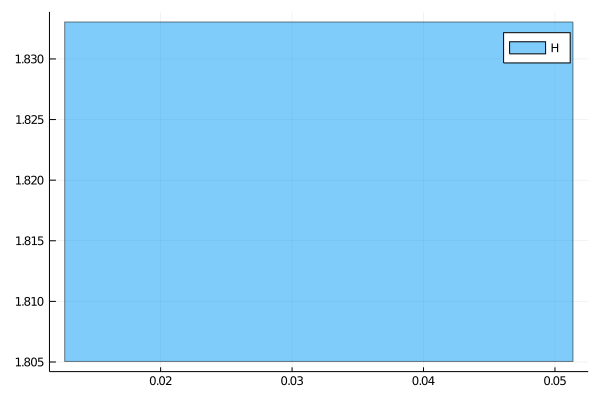

In [109]:
H = rand(Hyperrectangle, dim=2)
plot(H, lab="H")

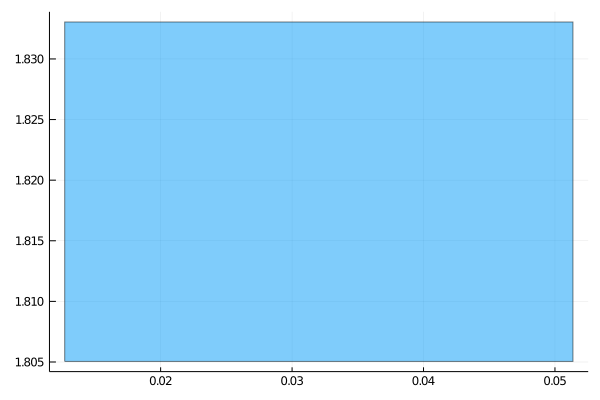

In [113]:
Hu = underapproximate(H, OctDirections(2));
plot(Hu)

In [88]:
using LazySets: _leq

function _issubset_constraints_list(S::LazySet{N}, P::LazySet{N},
                                    witness::Bool=false) where {N<:Real}
    @assert dim(S) == dim(P)

    @inbounds for H in constraints_list(P)
        α = ρ(H.a, S)
        β = H.b
        println("α = $α")
        println("β = $β")
        if !_leq(α, β)
            if witness
                return (false, σ(H.a, S))
            else
                return false
            end
        end
    end
    return witness ? (true, N[]) : true
end

_issubset_constraints_list (generic function with 2 methods)

In [47]:
using Plots

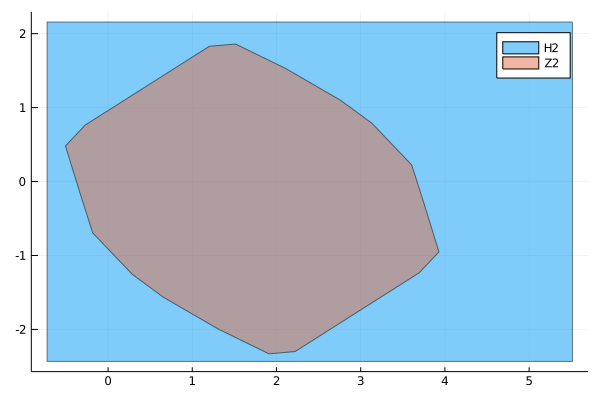

In [151]:
plot(project(H2, [1, 2]), lab="H2")
plot!(project(Z2, [1, 2]), lab="Z2")

In [ ]:

output_set = NeuralVerification.HPolytope([NeuralVerification.HalfSpace([1.0, 0.0, 0.0, 0.0], 0.47919249361761995), HalfSpace([0.0, 1.0, 0.0, 0.0], 0.21600299802246092), HalfSpace([0.0, 0.0, 1.0, 0.0], 0.13753126667274596), HalfSpace([0.0, 0.0, 0.0, 1.0], 0.536256411404834), HalfSpace([-1.0, 0.0, 0.0, 0.0], 0.05623084997936845), HalfSpace([0.0, -1.0, 0.0, 0.0], -0.02937453504189702), HalfSpace([0.0, 0.0, -1.0, 0.0], 0.7988290732045045), HalfSpace([0.0, 0.0, 0.0, -1.0], 1.1397183250614469)])
problem = NeuralVerification.Problem(network, input_set, output_set)

# Solve on Ai2
println(NeuralVerification.solve(Ai2h(), problem))

----

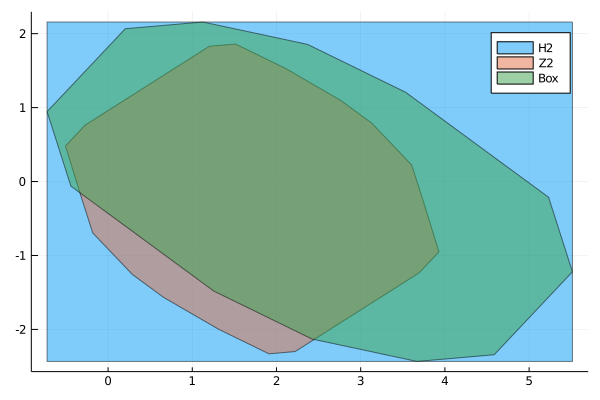

In [152]:
out_Box = forward_network(Box(), network, input_set)
plot!(project(out_Box, [1, 2]), lab="Box")

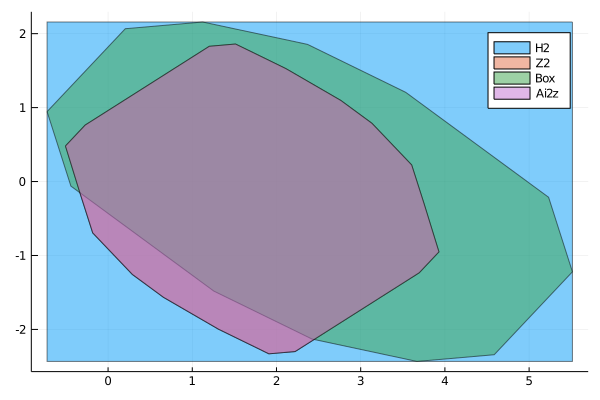

In [153]:
out_Ai2z = forward_network(Ai2z(), network, input_set)
plot!(project(out_Ai2z, [1, 2]), lab="Ai2z")
#plot!(project(Z2, [1, 2]), lab="Z2")

In [ ]:
> @mforets what you call Ai2h there is called Box, Ai2h is the old implementation of Ai2 in NeuralVerification!

ok, thanks.. i thought the `h` was for Hyperrectangle :)  now using the `forward_partition` API, (i) both `Box` and `Ai2z` work, (ii) `Ai2z` coincides with my plot above for the Z2 set, and (iii) `Box` doesn't return a box but a zonotope which is better than H2 but worse than Z2, which is expected i guess.

```julia
out_Box = forward_network(Box(), network, input_set)
plot!(project(out_Box, [1, 2]), lab="Box")

out_Ai2z = forward_network(Ai2z(), network, input_set)
plot!(project(out_Ai2z, [1, 2]), lab="Ai2z")
```

![Screenshot from 2020-08-01 23-15-55](https://user-images.githubusercontent.com/12424594/89113898-fb7b8280-d44c-11ea-915d-bd22c521f8f3.png)


